Mount Google Drive on Google Colab to load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

# Install mediapipe
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
"""
Import necessary libraries and modules for image processing and logging.

- re: Regular expression operations.
- os: Provides a way of using operating system dependent functionality.
- cv2: OpenCV library for computer vision tasks.
- logging: Logging module for tracking events during program execution.
- numpy: Numerical computing library for handling arrays and matrices.
- mediapipe: Library for building multimodal (eg. video, audio, etc.) perceptual applications.
- google.colab.patches.cv2_imshow: Patched version of cv2_imshow for displaying images in Google Colab.

Set logging level to INFO.
"""
import re
import os
import cv2
import logging
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

logging.basicConfig(level=logging.INFO)

# Step 1: Unzip the DSL10 dataset

In [ ]:
# /content/drive/MyDrive/DSL-10Dataset

In [ ]:
# Install unrar
!apt-get install -y unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import os

# Path to the .rar file and extraction directory
rar_path = '/content/drive/MyDrive/DSL-10Dataset/Videos.rar'
extraction_path = '/content/DSL-10Dataset'

# Create the extraction directory
os.makedirs(extraction_path, exist_ok=True)

# Extract the .rar file
!unrar x -r {rar_path} {extraction_path}
print("Dataset extracted successfully!")

# Verify extraction
extracted_files = os.listdir(extraction_path)
print(f"Files in extraction directory: {extracted_files}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/DSL-10Dataset/Videos.rar

Creating    /content/DSL-10Dataset/Videos                             OK
Creating    /content/DSL-10Dataset/Videos/hello                       OK
Extracting  /content/DSL-10Dataset/Videos/hello/hello_0.avi                0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_1.avi                0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_10.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_11.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_12.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/h

# Directory information of extracted videos

In [ ]:
import os

# Path to the extracted videos from DSL-10Dataset
dataset_path = '/content/DSL-10Dataset/Videos'

# List of words in the dataset
words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

# Check the number of video files for each word
for word in words:
    video_dir = os.path.join(dataset_path, word)
    if os.path.exists(video_dir):
        video_files = [f for f in os.listdir(video_dir) if f.endswith('.avi')]
        print(f"{word} directory contains {len(video_files)} video files")
    else:
        print(f"Directory for {word} does not exist")


hello directory contains 75 video files
howAre directory contains 75 video files
love directory contains 75 video files
mask directory contains 75 video files
no directory contains 75 video files
please directory contains 75 video files
sorry directory contains 75 video files
thanks directory contains 75 video files
wear directory contains 75 video files
you directory contains 75 video files


# Extract frames from the videos

In [ ]:
import cv2


def extract_frames(video_path, output_dir, size=(640, 480)):
    """
    Extract frames from a video file and save them as individual images.

    Parameters:
    - video_path (str): The path to the video file.
    - output_dir (str): The directory where the extracted frames will be saved.
    - size (tuple, optional): The desired size of the frames. Defaults to (640, 480).

    Returns:
    None

    Reference: https://docs.opencv.org/
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, size)
        frame_path = os.path.join(output_dir, f'frame_{frame_count:03d}.png')
        print("Saving frame.... ", frame_path)
        cv2.imwrite(frame_path, frame)
        frame_count += 1
    cap.release()
    print(f"Extracted {frame_count} frames from {video_path} to {output_dir}")

dataset_path = '/content/DSL-10Dataset/Videos'
output_base_path = '/content/Extracted_Frames'
os.makedirs(output_base_path, exist_ok=True)

# Extract frames for each word in the dataset
for word in words:
    video_dir = os.path.join(dataset_path, word)
    output_dir = os.path.join(output_base_path, word)
    os.makedirs(output_dir, exist_ok=True)
    # Get the list of video files for the current word
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.avi')]
    # Extract frames for each video file
    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        video_output_dir = os.path.join(output_dir, os.path.splitext(video_file)[0])
        os.makedirs(video_output_dir, exist_ok=True)
        extract_frames(video_path, video_output_dir)
    print(f"Frames extracted for word: {word}")


Streaming output truncated to the last 5000 lines.
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_025.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_026.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_027.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_028.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_029.png
Extracted 30 frames from /content/DSL-10Dataset/Videos/thanks/thanks_49.avi to /content/Extracted_Frames/thanks/thanks_49
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_000.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_001.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_002.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_003.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_004.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_005.png
Sa

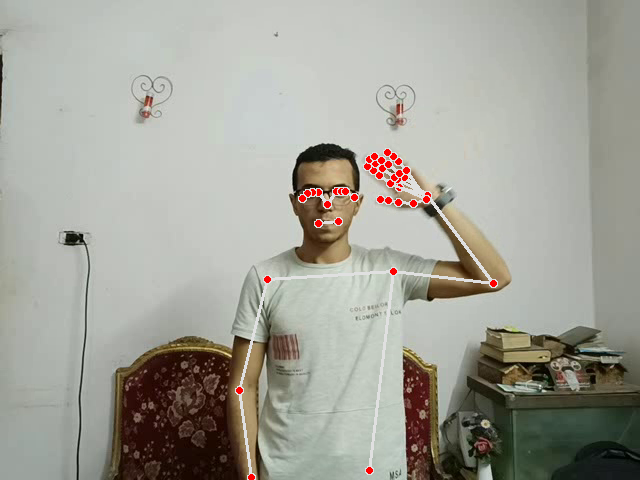

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils

def extract_keypoints_for_visualization(frame):
    """
    Extracts keypoints from a frame for visualization.

    Parameters:
    - frame: The input frame to extract keypoints from.

    Returns:
    - results: The extracted keypoints from the frame.

    Reference: https://google.github.io/mediapipe/solutions/holistic.html
    """
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        return results

def visualize_keypoints(frame, results):
    """
    Visualizes the keypoints on the given frame.

    Parameters:
    - frame: The frame on which to visualize the keypoints.
    - results: The results object containing the pose and hand landmarks.

    Returns:
    None

    Refernce: https://github.com/google-ai-edge/mediapipe
    """
    mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    cv2_imshow(frame)

# Visualize keypoints for a random frame
random_frame_path = '/content/Extracted_Frames/hello/hello_0/frame_027.png'
random_frame = cv2.imread(random_frame_path)

if random_frame is not None:
    random_results = extract_keypoints_for_visualization(random_frame)
    visualize_keypoints(random_frame, random_results)
else:
    print(f"Error: Unable to read the image from {random_frame_path}")


# Process Frames and Extract Keypoints using Mediapipe framework

In [ ]:
mp_holistic = mp.solutions.holistic

def extract_keypoints(frame):
    """
    Extracts the keypoints from a given frame using the Holistic model.

    Args:
        frame (numpy.ndarray): The input frame.

    Returns:
        list: A list of keypoints, where each keypoint is represented by its x, y, and z coordinates.
              The list is padded with zeros to have a length of 258.

    Refernce: https://github.com/google-ai-edge/mediapipe
    """
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        keypoints = []
        # Extract pose landmarks
        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        # Extract left hand landmarks        
        if results.left_hand_landmarks:
            for landmark in results.left_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        # Extract right hand landmarks
        if results.right_hand_landmarks:
            for landmark in results.right_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        # Pad the keypoints list with zeros to have a fixed length of 258
        keypoints.extend([0] * (258 - len(keypoints)))  
        return keypoints

def process_frames_and_extract_keypoints(input_dir, output_dir):
    """
    Process frames in the input directory and extract keypoints from each frame.
    
    Args:
        input_dir (str): Path to the directory containing input frames.
        output_dir (str): Path to the directory where the extracted keypoints will be saved.
    
    Returns:
        None
    """
    os.makedirs(output_dir, exist_ok=True)
    # Process each frame in the input directory
    for frame_name in os.listdir(input_dir):
        if frame_name.endswith('.png'):
            frame_path = os.path.join(input_dir, frame_name)
            frame = cv2.imread(frame_path)
            keypoints = extract_keypoints(frame)
            keypoints_path = os.path.join(output_dir, f'{frame_name[:-4]}.npy')
            np.save(keypoints_path, keypoints)
            print(f"Saved keypoints for frame {frame_name} to {keypoints_path}")

dataset_path = '/content/DSL-10Dataset/Videos'
output_base_path = '/content/Extracted_Frames'

# Extract keypoints for each word in the dataset
for word in words:
    word_dir = os.path.join(output_base_path, word)
    for video_dir in os.listdir(word_dir):
        video_input_dir = os.path.join(word_dir, video_dir)
        video_output_dir = os.path.join(word_dir, f'{video_dir}_keypoints')
        process_frames_and_extract_keypoints(video_input_dir, video_output_dir)
    print(f"Keypoints extracted for word: {word}")


Streaming output truncated to the last 5000 lines.
Saved keypoints for frame frame_007.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_007.npy
Saved keypoints for frame frame_015.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_015.npy
Saved keypoints for frame frame_019.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_019.npy
Saved keypoints for frame frame_016.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_016.npy
Saved keypoints for frame frame_018.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_018.npy
Saved keypoints for frame frame_014.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_014.npy
Saved keypoints for frame frame_011.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_011.npy
Saved keypoints for frame frame_005.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_005.npy
Saved keypoints for frame frame_008.png to /content/Extracted_Frames/

In [ ]:
import shutil

# Path to your Google Drive
drive_path = '/content/drive/MyDrive/Extracted_Keypoints'

# Create the directory if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Copy the extracted keypoints directory to your Google Drive
shutil.copytree('/content/Extracted_Frames', os.path.join(drive_path, 'Extracted_Frames'), dirs_exist_ok=True)

print("Extracted keypoints saved to Google Drive")


Extracted keypoints saved to Google Drive


In [ ]:
import tensorflow as tf

# Import necessary libraries for the code.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import os
import cv2

In [ ]:
def create_lstm_model(input_shape, num_classes):
    """
    Creates an LSTM model for sequence classification.

    Parameters:
    - input_shape (tuple): The shape of the input data (time steps, features).
    - num_classes (int): The number of classes for classification.

    Returns:
    - model (Sequential): The compiled LSTM model.
    """
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def load_data(base_dir, words):
    """
    Load data from the specified base directory, which google drive.

    Args:
        base_dir (str): The base directory path where the data is located.
        words (list): A list of words representing the classes.

    Returns:
        tuple: A tuple containing the loaded data. The first element is an array of keypoints (X),
               and the second element is an array of corresponding labels (y).
    """
    X, y = [], []
    for i, word in enumerate(words):
        keypoints_dir = os.path.join(base_dir, word)
        for video_dir in os.listdir(keypoints_dir):
            video_keypoints_dir = os.path.join(keypoints_dir, f'{video_dir}_keypoints')
            if not os.path.exists(video_keypoints_dir):
                continue
            for keypoint_file in os.listdir(video_keypoints_dir):
                if keypoint_file.endswith('.npy'):
                    keypoints = np.load(os.path.join(video_keypoints_dir, keypoint_file), allow_pickle=True)
                    if len(keypoints) != 258:
                        continue
                    X.append(keypoints)
                    y.append(i)
    X = np.array(X)
    y = tf.keras.utils.to_categorical(y, num_classes=len(words))
    return X, y

In [ ]:
words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

In [ ]:
import mediapipe as mp
import numpy as np
import cv2
import os

# Use this only when you want to load entire dataset

In [ ]:
# Load data from the extracted keypoints for DSL-10 dataset
output_base_path = '/content/drive/MyDrive/Extracted_Keypoints_DSL10/Extracted_Frames'
X, y = load_data(output_base_path, words)
print(f"Loaded data shape: {X.shape}, Labels shape: {y.shape}")

# Reshape data for LSTM model
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(f"Reshaped data shape: {X.shape}")

# Split data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model using the function defined earlier
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_lstm_model(input_shape, len(words))

# Callbacks for the model training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


# Use this for testing purpose as it loads only 10 frames per vocabulary in the dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf

# Load data from the extracted keypoints for DSL-10 dataset with limited frames
def load_data(base_dir, words, num_frames=10):
    X, y = [], []
    for i, word in enumerate(words):
        keypoints_dir = os.path.join(base_dir, word)
        for video_dir in os.listdir(keypoints_dir):
            video_keypoints_dir = os.path.join(keypoints_dir, f'{video_dir}_keypoints')
            if not os.path.exists(video_keypoints_dir):
                continue
            keypoint_files = [f for f in os.listdir(video_keypoints_dir) if f.endswith('.npy')]
            keypoint_files = sorted(keypoint_files)[:num_frames]  # Limit to num_frames
            for keypoint_file in keypoint_files:
                keypoints = np.load(os.path.join(video_keypoints_dir, keypoint_file), allow_pickle=True)
                if len(keypoints) != 258:
                    continue
                X.append(keypoints)
                y.append(i)
    X = np.array(X)
    y = tf.keras.utils.to_categorical(y, num_classes=len(words))
    return X, y

words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

# Load data with limited frames per word
output_base_path = '/content/drive/MyDrive/Extracted_Keypoints_DSL10/Extracted_Frames'
X, y = load_data(output_base_path, words, num_frames=10)
print(f"Loaded data shape: {X.shape}, Labels shape: {y.shape}")

# Reshape data for LSTM model
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(f"Reshaped data shape: {X.shape}")

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_lstm_model(input_shape, len(words))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


Loaded data shape: (7500, 258), Labels shape: (7500, 10)
Reshaped data shape: (7500, 1, 258)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Save the processed data

In [ ]:
# Save the processed data to Google Drive for future use
np.save('/content/drive/MyDrive/X_train.npy', X_train)
np.save('/content/drive/MyDrive/X_test.npy', X_test)
np.save('/content/drive/MyDrive/y_train.npy', y_train)
np.save('/content/drive/MyDrive/y_test.npy', y_test)


# Load the data next time google colab session ends

In [ ]:
# Load the processed data from Google Drive
X_train = np.load('/content/drive/MyDrive/X_train.npy')
X_test = np.load('/content/drive/MyDrive/X_test.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

# Verify the shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (6000, 1, 258), y_train shape: (6000, 10)
X_test shape: (1500, 1, 258), y_test shape: (1500, 10)


# Train the LSTM model on DSL10 dataset

In [ ]:
# Define the model 
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_lstm_model(input_shape, len(words))

# Print model summary
print(model.summary())
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model with the processed data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[early_stopping, reduce_lr])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,362 (454.54 KB)

 Trainable params: 116,362 (454.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1918 - loss: 2.1208 - val_accuracy: 0.4927 - val_loss: 1.5394 - learning_rate: 0.0010
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3972 - loss: 1.5599 - val_accuracy: 0.5367 - val_loss: 1.2046 - learning_rate: 0.0010
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4969 - loss: 1.2851 - val_accuracy: 0.6953 - val_loss: 0.9907 - learning_rate: 0.0010
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5995 - loss: 1.0807 - val_accuracy: 0.7407 - val_loss: 0.8114 - learning_rate: 0.0010
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6367 - loss: 0.9480 - val_accuracy: 0.7673 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7000 - loss: 0.8291 - val_accuracy: 0.8160 - val_loss: 0.5965 - learning_rate: 0.0010
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7419 - los

# LSTM Model prediction and Classification Report on DSL10 dataset

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

# Predict on the test set and get the class with the highest probability
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate and print metrics for the model
accuracy = accuracy_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
report = classification_report(y_true_classes, y_pred_classes, target_names=words)

print(f"Test Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(report)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.9693333333333334
Recall: 0.9693333333333334
F1 Score: 0.9694072763163629
Classification Report:
              precision    recall  f1-score   support

       hello       0.96      0.93      0.94       163
      howAre       0.98      0.95      0.97       147
        love       0.93      0.96      0.95       164
        mask       0.99      0.97      0.98       156
          no       0.93      0.98      0.95       132
      please       0.97      0.98      0.98       155
       sorry       0.98      0.99      0.98       147
      thanks       1.00      0.99      1.00       150
        wear       1.00      0.98      0.99       148
         you       0.96      0.96      0.96       138

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,362 (454.54 KB)

 Trainable params: 116,362 (454.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[early_stopping, reduce_lr])

# Plot Learning Curves

In [ ]:
# Plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_learning_curves(history)

In [ ]:
# Save the model in Keras format
model.save('/content/drive/MyDrive/sign_language_model.keras')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Install gtts library for text-to-speech conversion
!pip install gtts


In [ ]:
!pip install opencv-python numpy


# Experiment on ISL_CSLRT dataset with LSTM and BiLSTM models

In [ ]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/ISL_CSLRT_Corpus/corpus_csv_files/ISL_CSLRT_Corpus_details.csv'
df = pd.read_csv(csv_file_path)

# Create a subset of the DataFrame with only a few videos
df_subset = df.head(10)


In [ ]:
# Display the subset of the DataFrame
df_subset.head()

,Sentences,Frames Path
0,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
1,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
2,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
3,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
4,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...


# Process Videos, resize and change fps, remove Duplicate frames

In [ ]:
import cv2
import os
import numpy as np

def resize_and_change_fps(input_video_path, output_video_path, size=(640, 480), fps=35):
    """
    Resizes a video and changes its frames per second (fps).

    Parameters:
    - input_video_path (str): The path to the input video file.
    - output_video_path (str): The path to save the resized video.
    - size (tuple, optional): The desired width and height of the output video. Defaults to (640, 480).
    - fps (int, optional): The desired frames per second of the output video. Defaults to 35.

    Returns:
    None
    """
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Cannot open video file {input_video_path}")
        return
    # Get the video properties (fps, width, height)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, size)
    # Read and resize each frame
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, size)
        out.write(frame)

    cap.release()
    out.release()
    print(f"Resized and saved video: {output_video_path}")


def mse(imageA, imageB):
    """
    Calculates the mean squared error (MSE) between two images.

    Parameters:
    imageA (numpy.ndarray): The first image.
    imageB (numpy.ndarray): The second image.

    Returns:
    float: The mean squared error between the two images.
    """
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def remove_duplicate_frames(input_video_path, output_dir, mse_threshold=30):
    """
    Removes duplicate frames from a video file and saves the unique frames to the specified output directory.
    Parameters:
    - input_video_path (str): The path to the input video file.
    - output_dir (str): The directory where the unique frames will be saved.
    - mse_threshold (int): The Mean Squared Error (MSE) threshold for determining duplicate frames. Frames with an MSE below this threshold will be skipped.
    Returns:
    - None    
    """
    cap = cv2.VideoCapture(input_video_path)
    previous_frame = None
    frame_count = 0
    skipped_count = 0

    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Create a directory to save skipped frames
    skipped_dir = os.path.join(output_dir, 'Skipped_Frames')
    if not os.path.exists(skipped_dir):
        os.makedirs(skipped_dir)
    # Read each frame from the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Convert the frame to grayscale
        if previous_frame is not None:
            # Calculate the Mean Squared Error (MSE) between the previous frame and the current frame
            error = mse(previous_frame, frame)
            if error < mse_threshold:
                # Save the skipped frame 
                skipped_frame_path = os.path.join(skipped_dir, f'skipped_frame_{skipped_count:04d}.png')
                cv2.imwrite(skipped_frame_path, frame)
                print(f"Skipping duplicate frame {frame_count} and saved to {skipped_frame_path}")
                skipped_count += 1
                continue

        # Save unique frame to the output directory
        frame_path = os.path.join(output_dir, f'frame_{frame_count:04d}.png')
        cv2.imwrite(frame_path, frame)
        print(f"Saved frame: {frame_path}")
        frame_count += 1
        previous_frame = frame

    cap.release()
    print(f"Extracted {frame_count} frames from {input_video_path} to {output_dir}")


def preprocess_videos(df):
    """
    Preprocesses videos by resizing and changing FPS, and removing duplicate frames.
    Args:
        df (pandas.DataFrame): The input DataFrame containing video information.
    Raises:
        ValueError: If the sentence is invalid or missing.
    Returns:
        None
    """
    
    if not os.path.exists('Processed_Frames'):
        os.makedirs('Processed_Frames')

    for index, row in df.iterrows():
        try:
            # Get the sentence and video path, ensuring the sentence is a string
            sentence = str(row['Sentences']) if pd.notna(row['Sentences']) else None
            video_path = '/content/drive/MyDrive/' + row['Frames Path'].replace('\\', '/')

            if sentence is None:
                raise ValueError(f"Invalid or missing sentence at row {index}")

            output_video_path = video_path.replace('.MP4', '_resized.mp4')
            output_frames_dir = os.path.join('Processed_Frames', sentence)

            # Step 1: Resize and change FPS
            resize_and_change_fps(video_path, output_video_path)

            # Step 2: Remove duplicate frames
            remove_duplicate_frames(output_video_path, output_frames_dir)
            print(f"Processed: {video_path} and saved frames to {output_frames_dir}")

        except Exception as e:
            # Print error information and continue with the next row
            print(f"Error processing row {index}: {e}")
            print(f"Skipped video path: {row['Frames Path']} with sentence: {row['Sentences']}")
            continue


In [ ]:
# Preprocess complete dataset
preprocess_videos(df)

Streaming output truncated to the last 5000 lines.
Saved frame: Processed_Frames/which collegeschool are you from/frame_0124.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0125.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0126.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0127.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0128.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0129.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0130.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0131.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0132.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0133.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0134.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0135.png
Saved frame: 

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float'

In [ ]:
import shutil
import os

# Path were the frames are saved on google colab 
source_dir = '/content/Processed_Frames'

# Path to save the frames on google drive
destination_dir = '/content/drive/MyDrive/Processed_Frames'

# Create the destination directory if it does not exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the contents of the directory instead of the directory itself
for item in os.listdir(source_dir):
    s = os.path.join(source_dir, item)
    d = os.path.join(destination_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f"Processed frames have been copied to {destination_dir}")


Processed frames have been copied to /content/drive/MyDrive/Processed_Frames


# Process Frames and Extract Keypoints

In [ ]:

import os
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic

'''
This function is responsible for extracting keypoints (pose, hand landmarks) from a single video frame using the MediaPipe Holistic model.
Input: Takes a single video frame as input (frame).
Output: Returns the keypoints list, which is a flattened array of keypoint coordinates
'''
def extract_keypoints(frame):
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        keypoints = []
        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.left_hand_landmarks:
            for landmark in results.left_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.right_hand_landmarks:
            for landmark in results.right_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        keypoints.extend([0] * (258 - len(keypoints)))  
        return keypoints

'''
This function iterates over all frames in a given directory,
extracts keypoints for each frame using the extract_keypoints function, and saves them to a specified output directory.
Input:
input_dir: Directory containing the frames (images) to process.
output_dir: Directory where the extracted keypoints will be saved as .npy files.
Output: Saves .npy files containing the keypoints for each frame in the output directory.
'''
def process_frames_and_extract_keypoints(input_dir, output_dir):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for frame_name in os.listdir(input_dir):
        if frame_name.endswith('.png'):
            frame_path = os.path.join(input_dir, frame_name)
            frame = cv2.imread(frame_path)
            keypoints = extract_keypoints(frame)
            keypoints_path = os.path.join(output_dir, f'{frame_name[:-4]}.npy')
            np.save(keypoints_path, keypoints)
            print(f"Saved keypoints for frame {frame_name} to {keypoints_path}")

    # Copy the extracted keypoints to Google Drive
    google_drive_dir = '/content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT'
    if not os.path.exists(google_drive_dir):
        os.makedirs(google_drive_dir)

    # Copy the entire directory to Google Drive
    destination_dir = os.path.join(google_drive_dir, os.path.basename(output_dir))
    shutil.copytree(output_dir, destination_dir)

def process_all_sentences(processed_frames_dir, extracted_keypoints_dir):
    """
    Process all sentences in the given directory of processed frames and extract keypoints.
    Args:
        processed_frames_dir (str): The directory path containing the processed frames.
        extracted_keypoints_dir (str): The directory path to store the extracted keypoints.
    Returns:
        None
    """
    for sentence in os.listdir(processed_frames_dir):
        input_frames_dir = os.path.join(processed_frames_dir, sentence)
        output_keypoints_dir = os.path.join(extracted_keypoints_dir, sentence)

        print(f"Processing sentence: {sentence}")
        process_frames_and_extract_keypoints(input_frames_dir, output_keypoints_dir)
        print(f"Completed processing for sentence: {sentence}")




In [ ]:
processed_frames_dir = 'Processed_Frames'  # Directory where all processed frames are stored
extracted_keypoints_dir = 'Extracted_Keypoints'  # Directory where you want to save the extracted keypoints

# Process all sentences
process_all_sentences(processed_frames_dir, extracted_keypoints_dir)

Streaming output truncated to the last 5000 lines.
Saved keypoints for frame frame_0100.png to Extracted_Keypoints/he is on the way/frame_0100.npy
Saved keypoints for frame frame_0047.png to Extracted_Keypoints/he is on the way/frame_0047.npy
Saved keypoints for frame frame_0031.png to Extracted_Keypoints/he is on the way/frame_0031.npy
Saved keypoints for frame frame_0067.png to Extracted_Keypoints/he is on the way/frame_0067.npy
Saved keypoints for frame frame_0018.png to Extracted_Keypoints/he is on the way/frame_0018.npy
Saved keypoints for frame frame_0080.png to Extracted_Keypoints/he is on the way/frame_0080.npy
Saved keypoints for frame frame_0058.png to Extracted_Keypoints/he is on the way/frame_0058.npy
Saved keypoints for frame frame_0022.png to Extracted_Keypoints/he is on the way/frame_0022.npy
Saved keypoints for frame frame_0062.png to Extracted_Keypoints/he is on the way/frame_0062.npy
Saved keypoints for frame frame_0016.png to Extracted_Keypoints/he is on the way/fram

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def load_keypoints_data(base_dir):
    """
    Load keypoints data from the specified base directory.
    Args:
        base_dir (str): The base directory containing the keypoints data.
    Returns:
        tuple: A tuple containing the following elements:
            - X (numpy.ndarray): The keypoints data.
            - y (numpy.ndarray): The labels corresponding to the keypoints data.
            - filenames (list): The filenames of the keypoints data.
            - sentences (list): The list of unique sentences.
    """
    X, y, filenames = [], [], []
    sentences = os.listdir(base_dir)
    sentence_to_idx = {sentence: i for i, sentence in enumerate(sentences)}

    for sentence in sentences:
        keypoints_dir = os.path.join(base_dir, sentence)
        for keypoint_file in os.listdir(keypoints_dir):
            if keypoint_file.endswith('.npy'):
                keypoints = np.load(os.path.join(keypoints_dir, keypoint_file))
                X.append(keypoints)
                y.append(sentence_to_idx[sentence])
                filenames.append(os.path.join(keypoints_dir, keypoint_file))

    X = np.array(X)
    y = tf.keras.utils.to_categorical(y, num_classes=len(sentences))
    return X, y, filenames, sentences


# Load Keypoints data from Google Drive

In [ ]:
# Path to the extracted keypoints directory on Google Drive
extracted_keypoints_dir = '/content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT'

# Load data and filenames
X, y, filenames, sentences = load_keypoints_data(extracted_keypoints_dir)

# Verify the loaded data
print(f"Loaded {len(X)} samples from {len(sentences)} sentences.")
print(f"Sentences: {sentences}")
print(f"First 5 filenames: {filenames[:5]}")


Loaded 10626 samples from 99 sentences.
Sentences: ['are you hiding something', 'are you free today', 'now onwards he will never hurt you', 'do not take it to the heart', 'help me', 'i can not help you there', 'why are you disappointed', 'what have you planned for your career', 'i am in dilemma what to do', 'do not be stubborn', 'tell me truth', 'you are bad', 'what did you tell him', 'hi how are you', 'he she is my friend', 'why are you angry', 'i enjoyed a lot', 'do not abuse him', 'let him take time', 'prepare the bed', 'i am sitting in the class', 'go and sleep', 'turn on light turn off light', 'what is your phone number', 'which collegeschool are you from', 'could you please talk slower', 'how can i trust you', 'i am afraid of that', 'comb your hair', 'i am suffering from fever', 'i do not agree', 'i am feeling bored', 'i am crying', 'i was stopped by some one', 'i like you i love you', 'take care of yourself', 'i am so sorry to hear that', 'i am (age)', 'how dare you', 'i somehow

In [ ]:
# After loading the data for the first time
# Reference: https://docs.python.org/3/library/pickle.html
data = {
    'X': X,
    'y': y,
    'filenames': filenames,
    'sentences': sentences
}

# Save the data to a pickle file
with open('/content/drive/MyDrive/extracted_keypoints_data.pkl', 'wb') as f:
    pickle.dump(data, f)




Loaded 10626 samples from 99 sentences.
Sentences: ['are you hiding something', 'are you free today', 'now onwards he will never hurt you', 'do not take it to the heart', 'help me', 'i can not help you there', 'why are you disappointed', 'what have you planned for your career', 'i am in dilemma what to do', 'do not be stubborn', 'tell me truth', 'you are bad', 'what did you tell him', 'hi how are you', 'he she is my friend', 'why are you angry', 'i enjoyed a lot', 'do not abuse him', 'let him take time', 'prepare the bed', 'i am sitting in the class', 'go and sleep', 'turn on light turn off light', 'what is your phone number', 'which collegeschool are you from', 'could you please talk slower', 'how can i trust you', 'i am afraid of that', 'comb your hair', 'i am suffering from fever', 'i do not agree', 'i am feeling bored', 'i am crying', 'i was stopped by some one', 'i like you i love you', 'take care of yourself', 'i am so sorry to hear that', 'i am (age)', 'how dare you', 'i somehow

In [ ]:
# Install pickle for faster loading of data
import pickle

# Loading and Verifying Data from a Pickle File

In [ ]:
# To load the data in subsequent sessions
with open('/content/drive/MyDrive/extracted_keypoints_data.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X']
y = data['y']
filenames = data['filenames']
sentences = data['sentences']

# Verify the loaded data
print(f"Loaded {len(X)} samples from {len(sentences)} sentences.")
print(f"Sentences: {sentences}")
print(f"First 5 filenames: {filenames[:5]}")

Loaded 10626 samples from 99 sentences.
Sentences: ['are you hiding something', 'are you free today', 'now onwards he will never hurt you', 'do not take it to the heart', 'help me', 'i can not help you there', 'why are you disappointed', 'what have you planned for your career', 'i am in dilemma what to do', 'do not be stubborn', 'tell me truth', 'you are bad', 'what did you tell him', 'hi how are you', 'he she is my friend', 'why are you angry', 'i enjoyed a lot', 'do not abuse him', 'let him take time', 'prepare the bed', 'i am sitting in the class', 'go and sleep', 'turn on light turn off light', 'what is your phone number', 'which collegeschool are you from', 'could you please talk slower', 'how can i trust you', 'i am afraid of that', 'comb your hair', 'i am suffering from fever', 'i do not agree', 'i am feeling bored', 'i am crying', 'i was stopped by some one', 'i like you i love you', 'take care of yourself', 'i am so sorry to hear that', 'i am (age)', 'how dare you', 'i somehow

# Split the dataset in train and test and reshape to match the model input

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data and filenames
X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(X, y, filenames, test_size=0.2, random_state=42)

# Reshape the data to match the input shape required by the LSTM model
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Verify the shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (8500, 1, 258)
Testing data shape: (2126, 1, 258)


In [ ]:
# Print the filenames corresponding to the test data
print("Filenames in X_test:")
for i, filename in enumerate(filenames_test):
    print(f"Sample {i+1}: {filename}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# LSTM Architecture for ISL_CSLRT Dataset

In [ ]:
# Define the LSTM model for ISL-CSLRT dataset 
lstm_model_islcslrt = Sequential([
    LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(sentences), activation='softmax')  # Output layer
])

# Compile the model
lstm_model_islcslrt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    # Early stopping to stop training when the validation loss has not improved
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  
    # Save the best model with lowest validation loss
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),  
    # Reduce learning rate on plateau
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  
]

#Print Model Summary
print(lstm_model_islcslrt.summary())
# Train the model with callbacks
history_islcslrt = lstm_model_islcslrt.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=callbacks)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 1, 128)              │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 99)                  │          12,771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,011 (1.37 MB)

 Trainable params: 359,011 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.0142 - loss: 4.5735 - val_accuracy: 0.0230 - val_loss: 4.5094 - learning_rate: 0.0010
Epoch 2/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0222 - loss: 4.4921 - val_accuracy: 0.0372 - val_loss: 4.4034 - learning_rate: 0.0010
Epoch 3/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0287 - loss: 4.3771 - val_accuracy: 0.0362 - val_loss: 4.2481 - learning_rate: 0.0010
Epoch 4/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0414 - loss: 4.2465 - val_accuracy: 0.0550 - val_loss: 4.0391 - learning_rate: 0.0010
Epoch 5/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0541 - loss: 4.0835 - val_accuracy: 0.0903 - val_loss: 3.8090 - learning_rate: 0.0010
Epoch 6/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0651 - loss: 3.8764 - val_accuracy: 0.0978 - val_loss: 3.6131 - learning_rate: 0.0010
Epoch 7/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0865 - l

# Plot LSTM Model Learning Curve

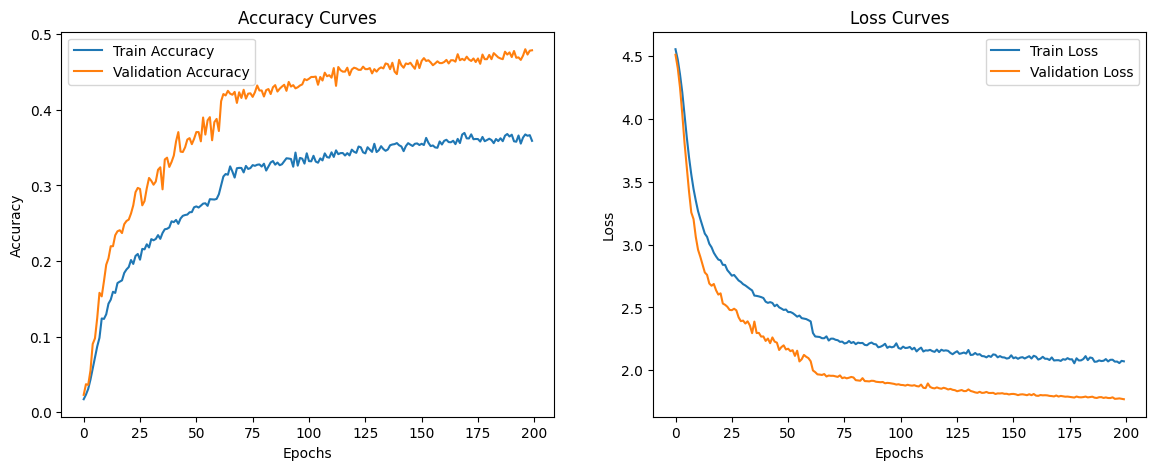

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_islcslrt.history['accuracy'], label='Train Accuracy')
plt.plot(history_islcslrt.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_islcslrt.history['loss'], label='Train Loss')
plt.plot(history_islcslrt.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = lstm_model_islcslrt.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Make predictions on the test set and compare with true labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4744 - loss: 1.7560
Test accuracy: 0.47883349657058716
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# LSTM model predictions and Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Make predictions
y_pred = lstm_model_islcslrt.predict(X_test)

# Step 2: Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 3: Generate and print the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=sentences)
print("Classification Report:")
print(report)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Classification Report:
                                       precision    recall  f1-score   support

             are you hiding something       0.62      0.25      0.36        20
                   are you free today       0.26      0.29      0.28        17
   now onwards he will never hurt you       0.58      0.31      0.40        36
          do not take it to the heart       0.20      0.03      0.06        29
                              help me       0.36      0.80      0.50        15
             i can not help you there       0.72      0.52      0.60        25
             why are you disappointed       0.50      0.13      0.21        30
what have you planned for your career       0.19      0.56      0.28        18
           i am in dilemma what to do       0.50      0.28      0.36        29
                   do not be stubborn       0.36      0.32      0.34        31
                        tell me truth       0.25      0.33      0.2

# BiLSTM network for ISLCSLRT dataset

In [ ]:
# Create a Bi-LSTM model for the ISL-CSLRT dataset
bi_model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(256, return_sequences=False, activation='relu')),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(len(sentences), activation='softmax')  # Output layer
])

# Compile the model
bi_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    # Early stopping to stop training when the validation loss has not improved
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  
    # Save the best model with lowest validation loss
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),  
    # Reduce learning rate on plateau
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)  
]

# Train the model with callbacks
bi_history = bi_model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.0346 - loss: 5.1016 - val_accuracy: 0.0132 - val_loss: 4.6043 - learning_rate: 0.0010
Epoch 2/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1120 - loss: 3.8685 - val_accuracy: 0.0282 - val_loss: 4.4623 - learning_rate: 0.0010
Epoch 3/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1625 - loss: 3.3371 - val_accuracy: 0.0889 - val_loss: 3.7397 - learning_rate: 0.0010
Epoch 4/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2165 - loss: 2.9848 - val_accuracy: 0.1980 - val_loss: 3.0994 - learning_rate: 0.0010
Epoch 5/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2550 - loss: 2.7347 - val_accuracy: 0.2135 - val_loss: 2.8912 - learning_rate: 0.0010
Epoch 6/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2804 - loss: 2.5701 - val_accuracy: 0.1924 - val_loss: 3.1345 - learning_rate: 0.0010
Epoch 7/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3070 - loss:

# Plot Learning Curves

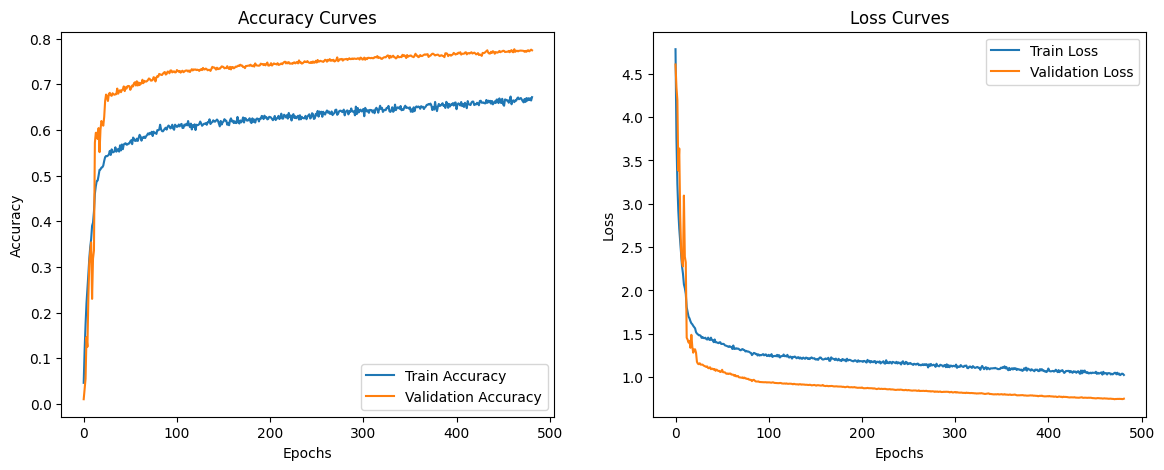

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(bi_history.history['accuracy'], label='Train Accuracy')
plt.plot(bi_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(bi_history.history['loss'], label='Train Loss')
plt.plot(bi_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
bi_model.save('/content/drive/MyDrive/ISL-CSLRT-bilstm.keras')
print("Model saved successfully!")


Model saved successfully!


# BiLSTM Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = bi_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = bi_model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate and print the classification report with precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=sentences))

# Additionally, calculate the overall test accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Overall Test Accuracy: {accuracy}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7566 - loss: 0.7818
Test accuracy: 0.7572906613349915
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
                                       precision    recall  f1-score   support

             are you hiding something       0.94      0.80      0.86        20
                   are you free today       0.71      0.71      0.71        17
   now onwards he will never hurt you       0.48      0.31      0.37        36
          do not take it to the heart       0.74      0.59      0.65        29
                              help me       0.93      0.93      0.93        15
             i can not help you there       0.87      0.80      0.83        25
             why are you disappointed       0.67      0.40      0.50        30
what have you planned for your career       0.33      0.72      0.45        18
           i am in dilemma what to do       0.87      0.69      0.77        29
                   do not be stubborn   

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Testing a sign Language Video on trained model
# Real Life Predictions on sentences

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
Prediction made: what is your phone number


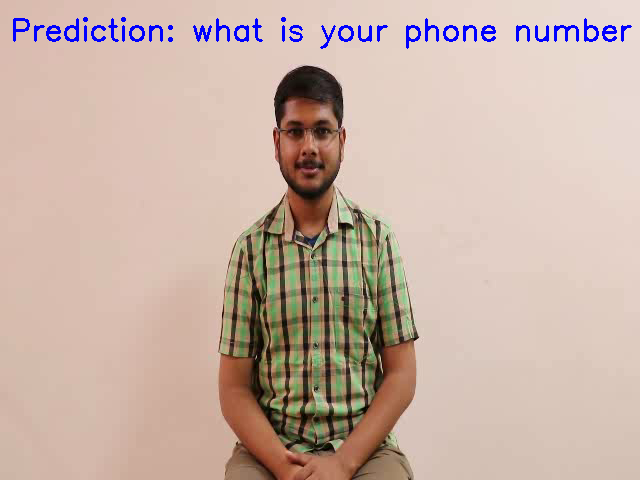

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load the trained model from Google Drive
model = load_model('/content/drive/MyDrive/ISL-CSLRT-bilstm.keras')

# Create a list to store the predictions for testing
class_labels = ['love', 'are you free today', 'can you help me', 'you need a medicine, take this one', 'what is your phone number',
                'could you please talk slower', 'pour some more water into the glass', 'what do you think']

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic

def extract_keypoints(frame):
    with mp_holistic.Holistic(static_image_mode=False, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        keypoints = []
        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.left_hand_landmarks:
            for landmark in results.left_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.right_hand_landmarks:
            for landmark in results.right_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        keypoints.extend([0] * (258 - len(keypoints)))  # Ensure fixed-size array
        return keypoints

# Set a threshold for considering frames as duplicates
mse_threshold = 100
def mse(imageA, imageB):
    # Mean Squared Error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Upload a video file and process it
video_path = '/content/drive/MyDrive/ISL_CSLRT_Corpus/Videos_Sentence_Level/what is your phone number/what is your phone number (1)_resized.mp4'
cap = cv2.VideoCapture(video_path)

previous_frame = None # Store the previous frame for comparison

prediction_made = False # Flag to check if a prediction was made

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Check if the current frame is similar to the previous frame
    if previous_frame is not None:
        error = mse(previous_frame, frame)
        if error < mse_threshold:
            print("Duplicate frame detected and skipped.")  
            # Skip processing this frame
            continue

    # Update previous_frame for the next iteration
    previous_frame = frame

    # Extract keypoints from the current frame
    keypoints = extract_keypoints(frame)
    keypoints = np.array(keypoints).reshape(1, 1, -1)  # Reshape for model input

    # Make a prediction using the trained model
    prediction = model.predict(keypoints)
    predicted_index = np.argmax(prediction)

    # Check if the predicted index is within the class labels
    if predicted_index < len(class_labels): 
        predicted_label = class_labels[predicted_index]
        print(f"Prediction made: {predicted_label}") 
        predictions.append(predicted_label)

        # Display the prediction on the frame
        cv2.putText(frame, f'Prediction: {predicted_label}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Display only the frame with the prediction
        cv2_imshow(frame)
        prediction_made = True
        break  # Exit the loop after showing the first prediction

if not prediction_made:
    print("No prediction was made during the video.")

cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS
import os

    tts = gTTS(text=final_prediction, lang='en')
    tts.save("final_prediction.mp3")
    os.system("mpg321 final_prediction.mp3")
else:
    print("No predictions were made.")
